<a href="https://colab.research.google.com/github/ansariwaleed/self_attention_and_transformer/blob/main/Highlighting_Key_EEG_Features_Using_Attention_Mechanisms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here i am trying to use attention mechanism to hihglight important features of an EEG.

In [51]:
!pip install mne

import mne
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#load EEG file
raw = mne.io.read_raw_fif("/content/drive/MyDrive/rest_eeg_cleaned/Subject04_1_cleaned.fif", preload=True)

Opening raw data file /content/drive/MyDrive/rest_eeg_cleaned/Subject04_1_cleaned.fif...
    Range : 0 ... 84999 =      0.000 ...   169.998 secs
Ready.
Reading 0 ... 84999  =      0.000 ...   169.998 secs...


<ipython-input-52-3e79dcc5c57b>:2: RuntimeWarning: This filename (/content/drive/MyDrive/rest_eeg_cleaned/Subject04_1_cleaned.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif("/content/drive/MyDrive/rest_eeg_cleaned/Subject04_1_cleaned.fif", preload=True)


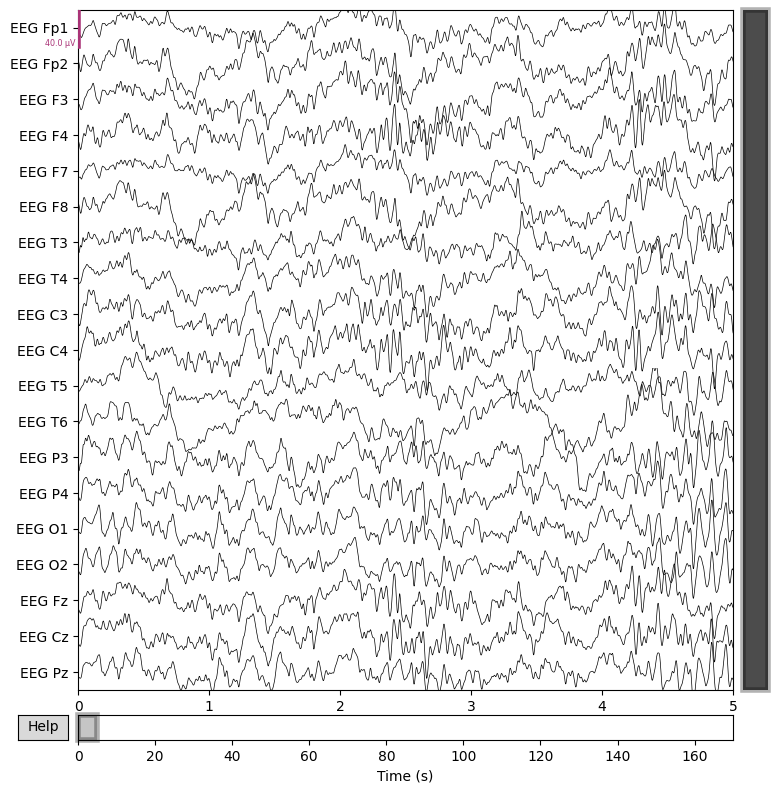

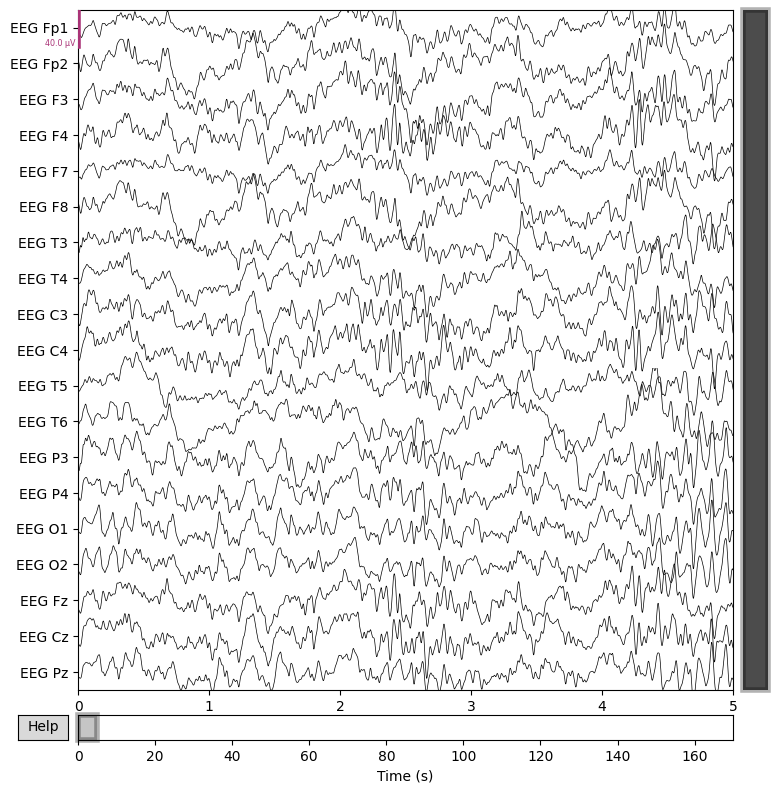

In [53]:
# Plot the first 5 seconds of the EEG
raw.plot(duration=5, start=0)

In [54]:
raw.info

<Info | 11 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2010-01-01 00:00:00 UTC
 meas_id: 4 items (dict)
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
 subject_info: <subject_info | his_id: 30, last_name: Subject4, birthday: 1993-01-01, sex: 1>
>

In [55]:
# Get data from all channels
data, times = raw[:, :]  # All channels, all time points (shape: (n_channels, 85000))
sfreq = raw.info['sfreq']  # Sampling frequency (500 Hz)
n_channels = raw.info['nchan']  # Number of channels
channel_names = raw.ch_names  # Channel names

In [56]:
# Limit to first 5 seconds for the first plot
n_samples_5s = int(5 * sfreq)  # 5 seconds * 500 Hz = 2500 samples
data_5s = data[:, 0:n_samples_5s]  # All channels, first 5 seconds (shape: (n_channels, 2500))
times_5s = times[0:n_samples_5s]  # Time points for first 5 seconds (shape: (2500,))

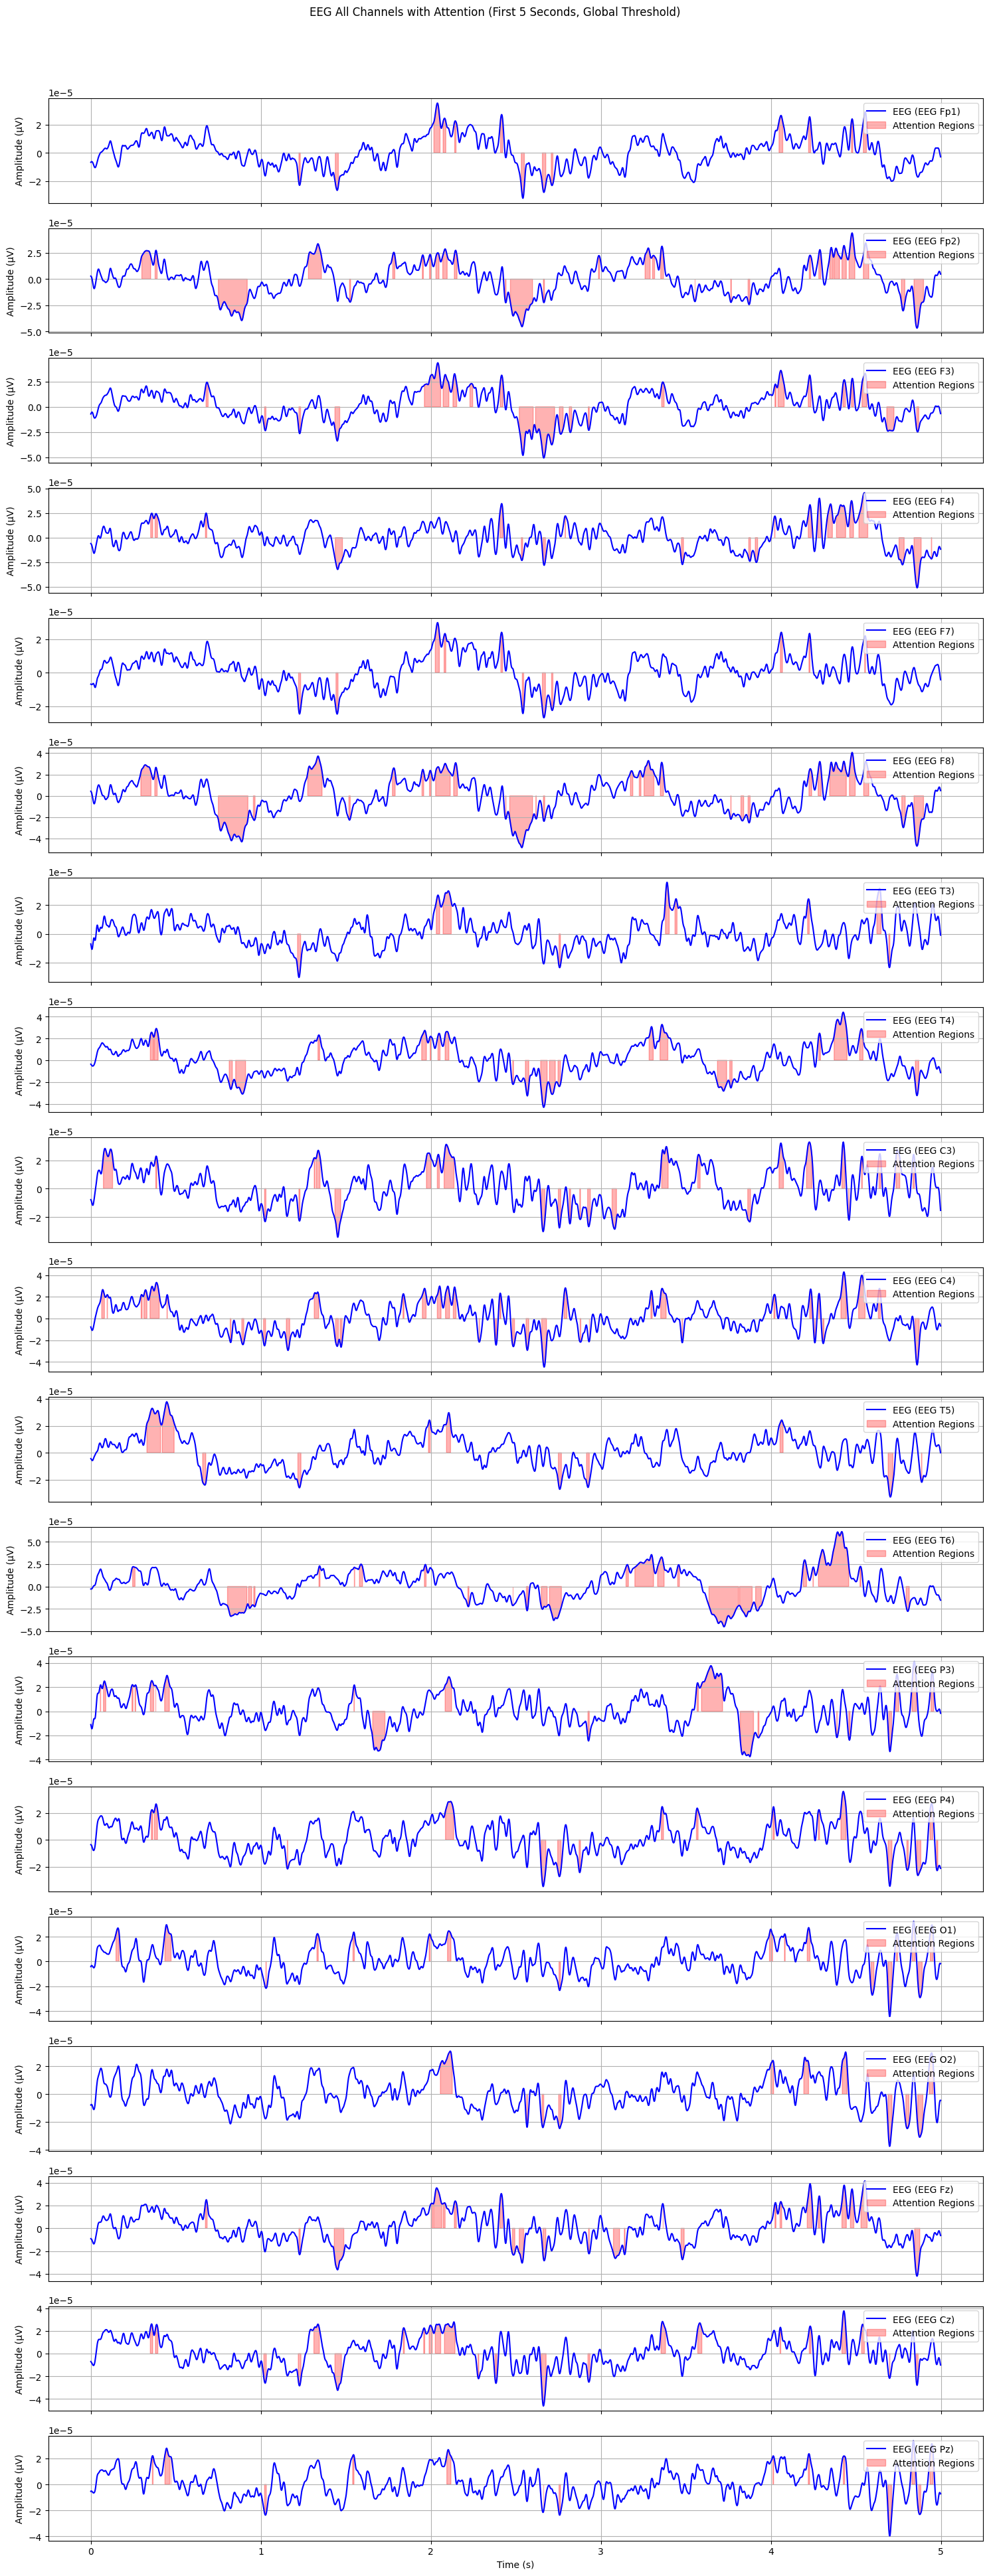

In [57]:
# First Plot: EEG with Attention (First 5 Seconds)
fig1, axes = plt.subplots(n_channels, 1, figsize=(15, 2 * n_channels), sharex=True)
if n_channels == 1:
    axes = [axes]

# Global threshold for attention (based on first 5 seconds for consistency in the first plot)
global_threshold_5s = np.percentile(np.abs(data_5s), 90)  # Single threshold for all channels

# Plot each channel for the first 5 seconds
for ch_idx in range(n_channels):
    data_ch_5s = data_5s[ch_idx, :]  # 1D array for this channel, first 5s (shape: (2500,))
    attention_mask_5s = np.abs(data_ch_5s) > global_threshold_5s  # Use global threshold

    # Plot EEG signal
    axes[ch_idx].plot(times_5s, data_ch_5s, label=f'EEG ({channel_names[ch_idx]})', color='blue')
    axes[ch_idx].fill_between(times_5s, data_ch_5s, where=attention_mask_5s, color='red', alpha=0.3, label='Attention Regions')
    axes[ch_idx].set_ylabel('Amplitude (µV)')
    axes[ch_idx].legend(loc='upper right')
    axes[ch_idx].grid(True)

axes[-1].set_xlabel('Time (s)')
fig1.suptitle('EEG All Channels with Attention (First 5 Seconds, Global Threshold)', y=1.02)
plt.tight_layout()

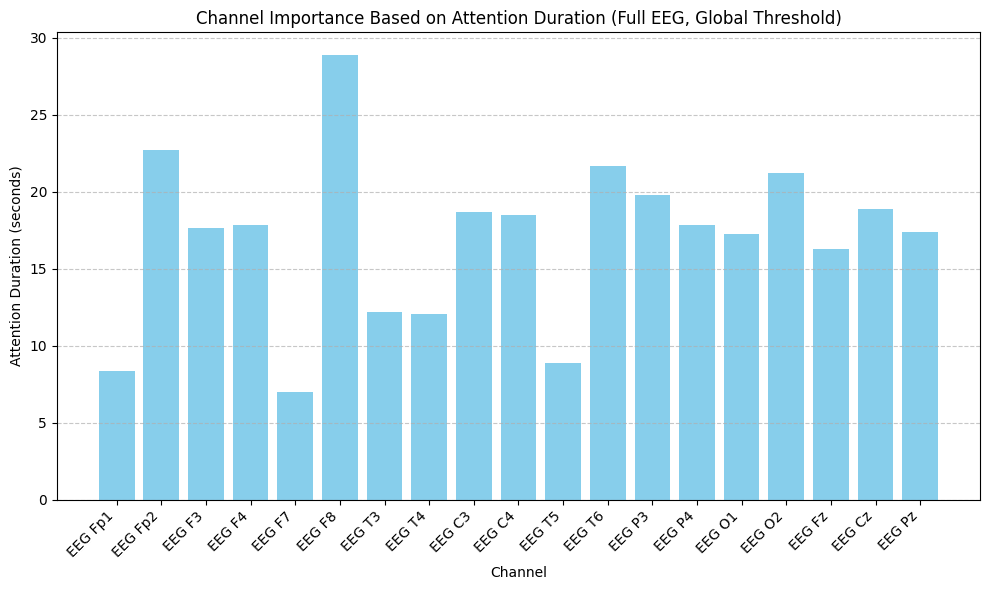

In [58]:
#Second Plot: Bar Graph of Channel Importance (Full EEG)
# Global threshold for the full EEG
global_threshold_full = np.percentile(np.abs(data), 90)  # Single threshold for all channels, full data
attention_durations = []
total_duration = times[-1]  # Total duration in seconds (169.998 s)

for ch_idx in range(n_channels):
    data_ch_full = data[ch_idx, :]  # Full data for this channel (shape: (85000,))
    attention_mask_full = np.abs(data_ch_full) > global_threshold_full  # Use global threshold
    attention_duration = np.sum(attention_mask_full) / sfreq  # Duration in seconds
    attention_durations.append(attention_duration)# Create bar graph
fig2, ax = plt.subplots(figsize=(10, 6))
ax.bar(channel_names, attention_durations, color='skyblue')
ax.set_xlabel('Channel')
ax.set_ylabel('Attention Duration (seconds)')
ax.set_title('Channel Importance Based on Attention Duration (Full EEG, Global Threshold)')
plt.xticks(rotation=45, ha='right')  # Rotate channel names for readability
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout for the bar graph
plt.tight_layout()


In [59]:
#Debugging: Print attention durations ---
print("Attention Durations (seconds) for each channel:")
for ch_name, duration in zip(channel_names, attention_durations):
    print(f"{ch_name}: {duration:.2f} seconds")

Attention Durations (seconds) for each channel:
EEG Fp1: 8.33 seconds
EEG Fp2: 22.72 seconds
EEG F3: 17.63 seconds
EEG F4: 17.86 seconds
EEG F7: 7.00 seconds
EEG F8: 28.89 seconds
EEG T3: 12.18 seconds
EEG T4: 12.08 seconds
EEG C3: 18.70 seconds
EEG C4: 18.50 seconds
EEG T5: 8.88 seconds
EEG T6: 21.67 seconds
EEG P3: 19.77 seconds
EEG P4: 17.82 seconds
EEG O1: 17.25 seconds
EEG O2: 21.21 seconds
EEG Fz: 16.28 seconds
EEG Cz: 18.87 seconds
EEG Pz: 17.36 seconds
